<a href="https://colab.research.google.com/github/Morshed2550/SocialMedia/blob/main/thesis_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import os
import pathlib
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model, callbacks
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Convolution2D,Activation,Flatten,Dense,Dropout,MaxPool2D,BatchNormalization

In [25]:
data = '/content/drive/MyDrive/Thesis/Potato/Train'

In [26]:
classes=[]
for file in os.listdir(data):
    classes+=[file]
print(classes)
print(len(classes))

['Potato___healthy', 'Potato___Early_blight', 'Potato___Late_blight']
3


In [28]:
potato___healthy = [data + '/Potato___healthy/' + img for img in os.listdir(data + '/Potato___healthy')[:9]]
potato___Early_blight = [data  + '/Potato___Early_blight/' + img for img in os.listdir(data + '/Potato___Early_blight')[:9]]
potato___Late_blight = [data  + '/Potato___Late_blight/' + img for img in os.listdir(data + '/Potato___Late_blight')[:9]]

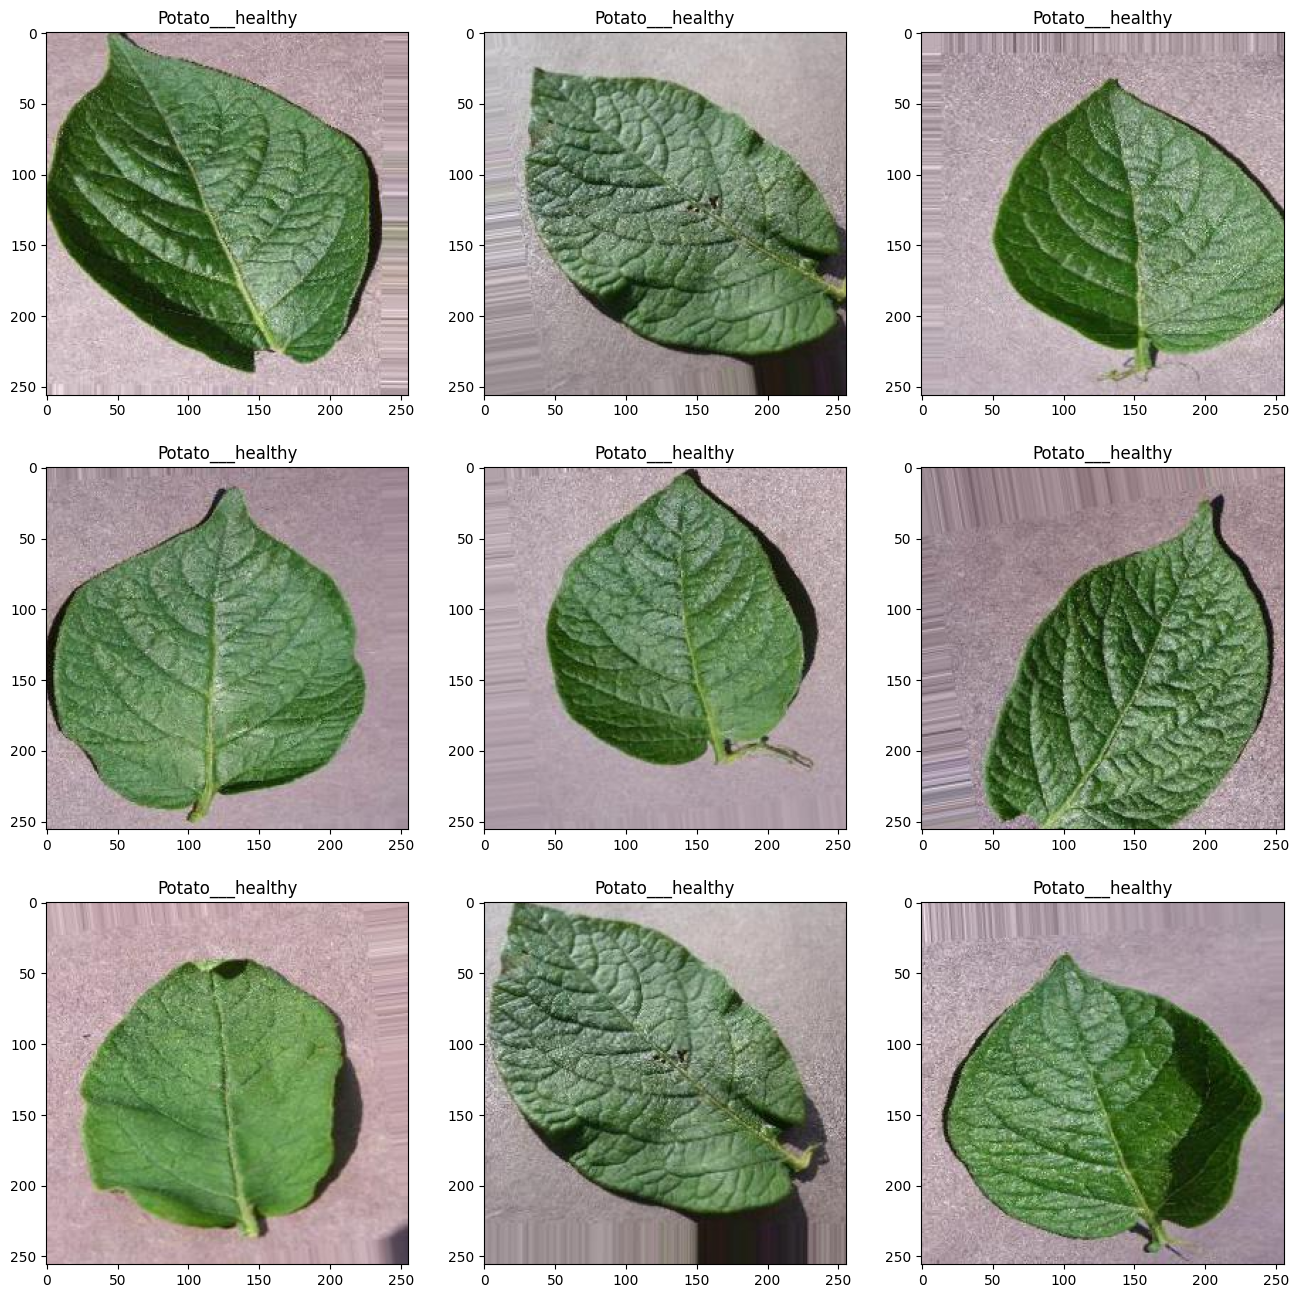

In [30]:
from PIL import Image
plt.figure(figsize=(16,16))
for i,k  in enumerate(potato___healthy):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Potato___healthy")


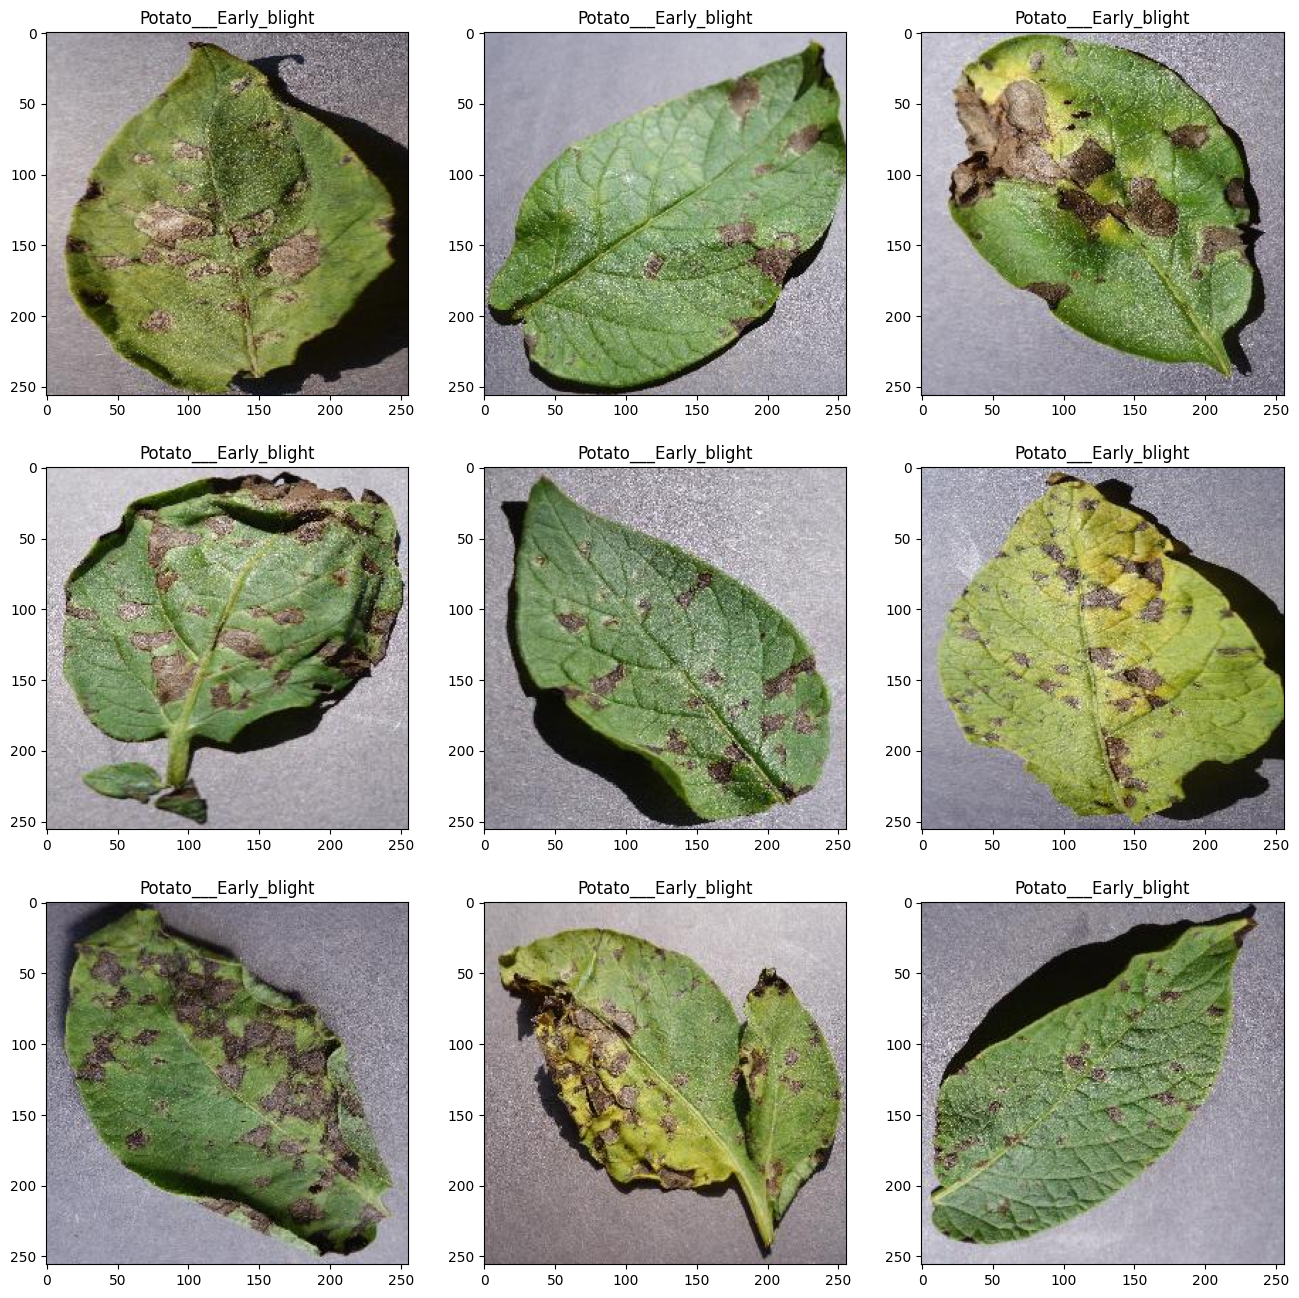

In [31]:
plt.figure(figsize=(16,16))
for i,k  in enumerate(potato___Early_blight):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Potato___Early_blight")

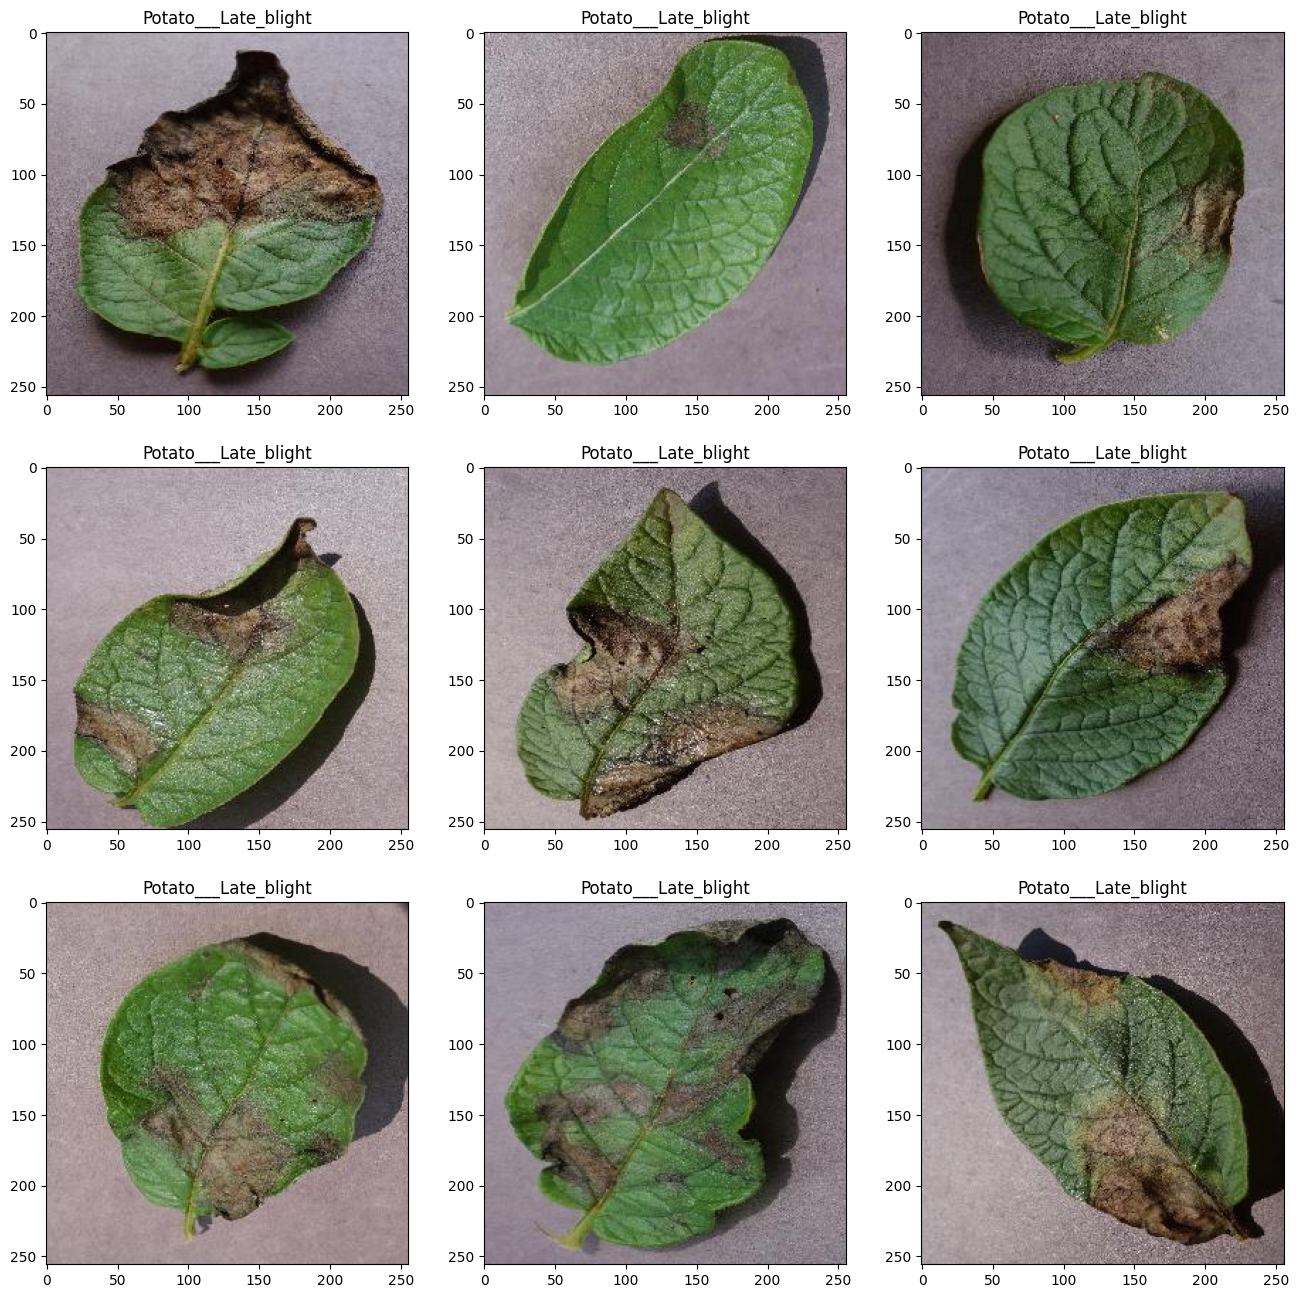

In [32]:
plt.figure(figsize=(16,16))
for i,k  in enumerate(potato___Late_blight):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Potato___Late_blight")


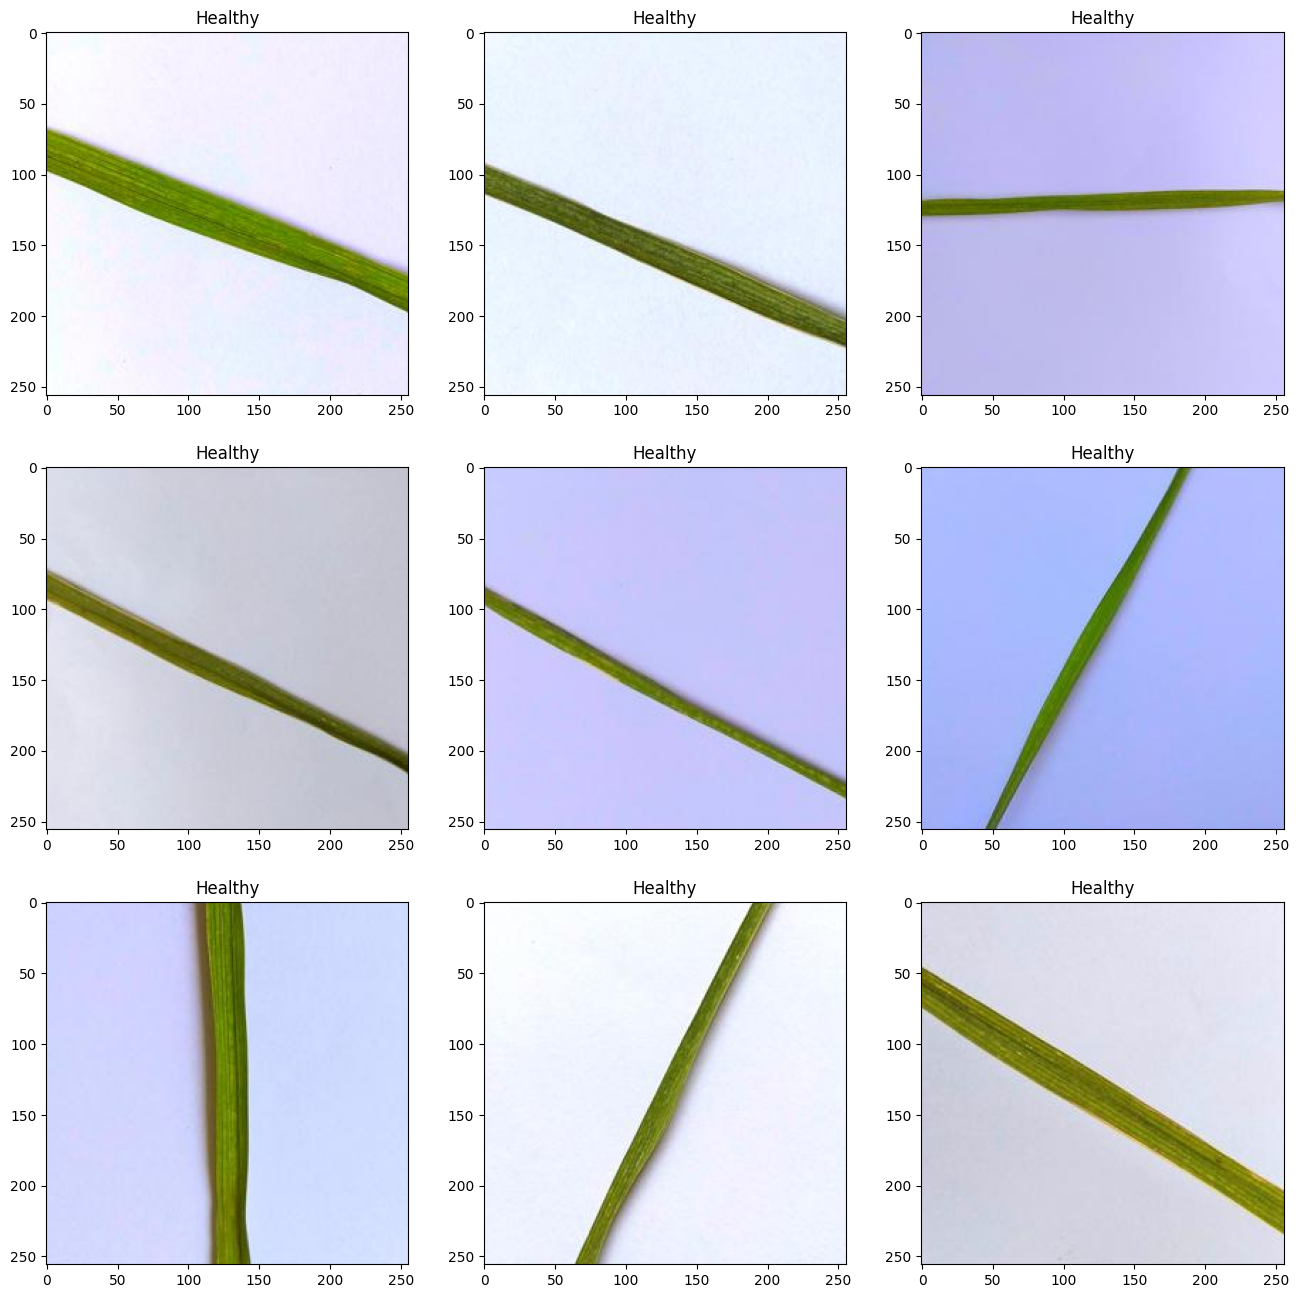

In [12]:
plt.figure(figsize=(16,16))
for i,k  in enumerate(healthy):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Healthy")

In [33]:
dataGenerator = ImageDataGenerator(rescale= 1. / 255, validation_split=0.2)
train_data = dataGenerator.flow_from_directory(
    data,
    target_size=(224,224),
    batch_size=64,
    class_mode='categorical',
    shuffle=True,
    subset = 'training'
)
val_data = dataGenerator.flow_from_directory(
    data,
    target_size=(224,224),
    batch_size=64,
    class_mode='categorical',
    shuffle=True,
    subset = 'validation'
)

Found 720 images belonging to 3 classes.
Found 180 images belonging to 3 classes.


In [37]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3,3), padding='same', input_shape = (224,224,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(3, 3)))
model.add(Conv2D(128, kernel_size=(3,3), padding='same', input_shape = (224,224,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(3, 3)))
model.add(Conv2D(256, kernel_size=(3,3), padding='same', input_shape = (224,224,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(3, 3)))
model.add(Conv2D(512, kernel_size=(3,3), padding='same', input_shape = (224,224,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(3, 3)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 batch_normalization_8 (Batc  (None, 224, 224, 64)     256       
 hNormalization)                                                 
                                                                 
 activation_8 (Activation)   (None, 224, 224, 64)      0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 74, 74, 128)       73856     
                                                                 
 batch_normalization_9 (Batc  (None, 74, 74, 128)     

In [38]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [39]:
history = model.fit(train_data,validation_data=val_data,epochs=20)


Epoch 1/20
12/12 [==============================] - 236s 19s/step - loss: 1.5917 - accuracy: 0.5819 - val_loss: 1.2995 - val_accuracy: 0.3333
Epoch 2/20
12/12 [==============================] - 218s 18s/step - loss: 0.3854 - accuracy: 0.8667 - val_loss: 1.1529 - val_accuracy: 0.3444
Epoch 3/20
12/12 [==============================] - 206s 17s/step - loss: 0.2266 - accuracy: 0.9194 - val_loss: 1.3365 - val_accuracy: 0.3556
Epoch 4/20
12/12 [==============================] - 219s 18s/step - loss: 0.2015 - accuracy: 0.9306 - val_loss: 1.5359 - val_accuracy: 0.3333
Epoch 5/20
12/12 [==============================] - 209s 17s/step - loss: 0.2050 - accuracy: 0.9403 - val_loss: 1.5940 - val_accuracy: 0.3333
Epoch 6/20
12/12 [==============================] - 221s 20s/step - loss: 0.1784 - accuracy: 0.9292 - val_loss: 2.3002 - val_accuracy: 0.3333
Epoch 7/20
12/12 [==============================] - 219s 18s/step - loss: 0.1135 - accuracy: 0.9681 - val_loss: 2.4413 - val_accuracy: 0.3333
Epoch 

In [40]:
def plot_training_curves(history_df):
    plt.figure(figsize = (13, 4), dpi = 120)
    ax = plt.subplot(1, 2, 1)
    plt.plot(range(1, len(history_df) + 1), history_df['loss'], marker = '.', label = 'Training Loss')
    plt.plot(range(1, len(history_df) + 1), history_df['val_loss'], marker = '^', label = 'Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Cross Entropy')
    plt.grid()
    plt.legend()
    ax = plt.subplot(1, 2, 2)
    plt.plot(range(1, len(history_df) + 1), history_df['accuracy'], marker = '.', label = 'Training Accuracy')
    plt.plot(range(1, len(history_df) + 1), history_df['val_accuracy'], marker = '^', label = 'Validation Accurcay')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.legend()
    plt.show()

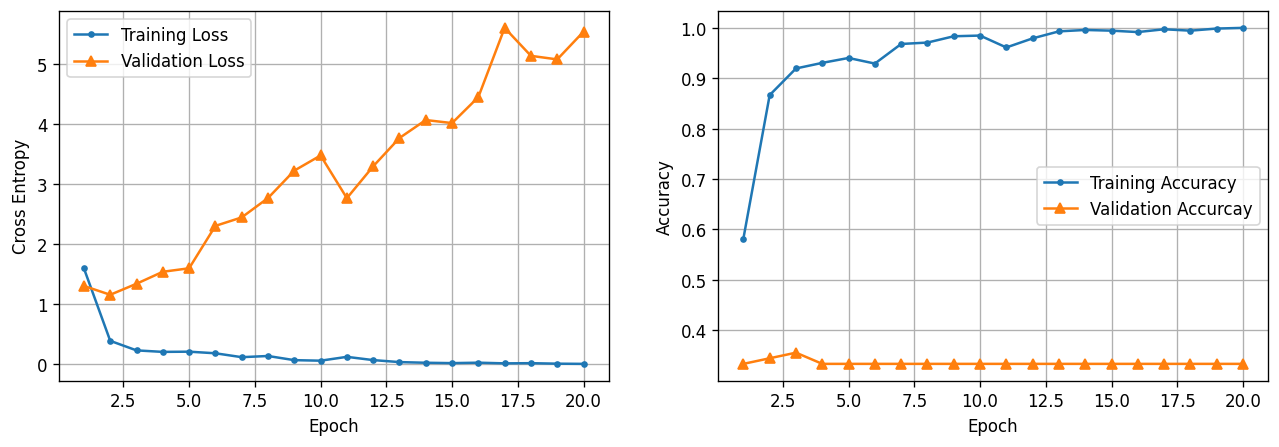

In [41]:
plot_training_curves(pd.DataFrame(history.history))